#                     FORWARD PROPAGATORS: EXL EQ 2023
                                   
                                     BY: VEDANT PANDEY AND HARSH KUMAR
                                                NIT JAMSHEDPUR

In the following notebook we will be performing PM 2.5 Prediction using the dataset provided. We will also be performing Exploratory Data Analysis, Feature Engineering, Visualizations etc, along the way. So, let's get started.
Here, in this notebook I am sharing the FaceBook Prophet Code which was used for the final Predictions. We had also explored LSTM,ARIMA,SARIMAX for PM 2.5 prediction. We found Fbprophet to be most suitable for the prediction due to various reasons.


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler,LabelEncoder



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore') #used to handle warnings and filterwarnings('ignore') is used to ignore the warnings

Some of the analysis and Modelling had been performed in Google Colab and major part of it is done in Jupyter Notebook. So, follwing codes are used to import the data when ananlysis and modelling(Fbprophet) is being performed in Google Colab.

In [2]:
#from google.colab import files
 
 
#uploaded = files.upload()

In [3]:
#import io

In [4]:

#data=pd.read_csv(io.BytesIO(uploaded['EXL_EQ_2023_Dataset.csv']))
#data.head(10)

# Importing the data

In [5]:
data=pd.read_csv("D:\\EQ\\EXL_EQ_2023_Dataset.csv")

# Exploratory Data Analysis

In [6]:
data.head()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),CNG ONLY,DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
0,549.256878,181.010975,91.247522,188.364425,79.707417,10.175812,3.520142,23.411029,NaN,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",01-01-2020 00:00
1,435.438303,194.247049,79.661701,203.481853,66.258913,11.615925,3.464807,29.331609,9.827428,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",01-01-2020 04:00
2,453.312378,112.499494,121.740909,153.914993,74.356791,10.590183,2.460498,30.172308,9.085975,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",01-01-2020 08:00
3,186.603123,56.922094,114.142207,91.504524,NaN,12.217971,1.405930,30.493537,3.884649,104.475114,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",01-01-2020 12:00
4,262.616309,77.363086,123.790340,117.065760,NaN,13.331616,2.692100,18.045684,5.605006,96.718827,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",01-01-2020 16:00


In [7]:
data.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene',
       'Toluene', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF',
       'VWS', 'Eth-Benzene', 'Xylene', 'MP-Xylene', 'O Xylene', 'CH4', 'City',
       'State', 'Population as of 2021 (Estimated)', 'Latitude', 'Longitude',
       'Total Length of Roads as of 2019(Km)',
       'Length of National Highways as of 2022(Km)',
       'Railway Route as of 2021(Km)', 'Forest Cover as of 2021(sq Km)',
       'Number of Factories as of 2020 (Units)',
       'Installed Capacity of Power as of 2022(Megawatt)',
       'Death Rate as of 2020(Per 1000)', 'CNG ONLY', 'DIESEL',
       'DIESEL/HYBRID', 'ELECTRIC(BOV)', 'PETROL', 'PETROL/CNG',
       'PETROL/HYBRID', 'Time Periods'],
      dtype='object')

We can see there are many columns present in our dataset. Let's check their types

In [8]:
data.dtypes

PM2.5                                               float64
NO                                                  float64
NO2                                                 float64
NOx                                                 float64
NH3                                                 float64
SO2                                                 float64
CO                                                  float64
Ozone                                               float64
Benzene                                             float64
Toluene                                             float64
Temp                                                float64
RH                                                  float64
WS                                                  float64
WD                                                  float64
SR                                                  float64
BP                                                  float64
AT                                      

In [9]:
data.shape

(223584, 45)

There are total of 223584 rows and 45 Columns in our dataset.
Also, let's change the Time Periods column to Pandas Date Time Columns

In [10]:
data['Time Periods']=pd.to_datetime(data['Time Periods'])
data.tail(10)

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),CNG ONLY,DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
223574,219.000719,50.557138,98.151185,101.259618,90.475998,62.762834,2.459403,73.667426,3.130069,6.208783,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-30 08:00:00
223575,208.381273,18.983172,82.440362,68.036480,88.716628,62.956958,1.976863,107.744772,3.075138,5.942423,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-30 12:00:00
223576,214.321438,16.167233,84.876160,67.504995,87.781765,51.517436,2.095507,94.048741,3.070328,6.006257,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-30 16:00:00
223577,285.911789,35.048373,82.581161,80.821759,94.219121,44.669702,2.292398,63.534009,4.017453,8.332340,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-30 20:00:00
223578,197.599326,88.127388,97.476115,122.761754,121.053781,54.952930,2.850841,54.881633,3.978075,9.821438,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-31 00:00:00
223579,196.989121,60.688939,88.463906,104.906711,109.511292,53.108086,2.336561,55.699203,3.684526,7.927572,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-31 04:00:00
223580,187.428487,56.707438,93.311216,103.099160,106.682026,55.535340,2.235001,73.030945,3.388236,6.980251,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-31 08:00:00
223581,176.635690,28.382382,87.318776,80.058537,110.258415,53.701056,1.754315,93.830288,3.328736,6.993954,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-31 12:00:00
223582,189.740021,12.664340,54.773063,51.766913,67.224030,40.155829,1.361177,73.099207,2.423073,4.875033,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-31 16:00:00
223583,164.385975,24.014566,66.402465,70.142974,94.957895,33.771574,1.770766,45.108456,2.719856,6.109795,...,43446,5.5,"48,888","2,96,334",155,"1,36,039","17,41,675","1,09,369","22,206",2022-12-31 20:00:00


In [11]:
a=data[['Population as of 2021 (Estimated)','City']].groupby('City').median()
data['Population as of 2021 (Estimated)'].unique()

array([31181377, 8253226, 268000, 3764619, 1692509, 1728435, 1415463,
       2143000, 2261561, 828000, 3153425, 1232190, 1135065, 1838000,
       1140000, 4007505, 1430870, 593524, 2690703, 595210, 575652, 516403,
       2481530, 1622454, 5400000, 14974073, 2446882, 1409820, 12764935,
       1702048, 1225129, 1169244, 11235018, '11235018', '20667655', ' '],
      dtype=object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223584 entries, 0 to 223583
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   PM2.5                                             218044 non-null  float64       
 1   NO                                                218735 non-null  float64       
 2   NO2                                               218244 non-null  float64       
 3   NOx                                               217612 non-null  float64       
 4   NH3                                               217948 non-null  float64       
 5   SO2                                               219700 non-null  float64       
 6   CO                                                219762 non-null  float64       
 7   Ozone                                             219154 non-null  float64       
 8   Benzene       

In [13]:
data.City.value_counts()

Delhi                 6576
Kolkata               6576
Agartala              6576
Gaya                  6576
Muzaffarpur           6576
Patna                 6576
Srinagar              6576
Howrah                6576
Bhopal                6576
Ahmedabad             6576
Gwalior               6576
Bengaluru             6576
Raipur                6576
Bhilai                6576
Chandigarh            6576
Chennai               6576
Thiruvananthapuram    6576
Imphal                6576
Kota                  6576
Jaipur                6576
Gurugram              6576
Faridabad             6576
Guwahati              6576
Moradabad             6576
Kanpur                6576
Noida                 6576
Agra                  6576
Ghaziabad             6576
Prayagraj             6576
Meerut                6576
Varanasi              6576
Lucknow               6576
Gandhinagar           6576
Mumbai                6576
Name: City, dtype: int64

In [14]:
data.City.nunique()

34

We can see there are a total of 6576 entries from 34 Cities all across India. 

In [15]:
data.describe()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Latitude,Longitude,Total Length of Roads as of 2019(Km),Length of National Highways as of 2022(Km),Railway Route as of 2021(Km),Forest Cover as of 2021(sq Km),Number of Factories as of 2020 (Units),Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),DIESEL/HYBRID
count,218044.000000,218735.000000,218244.000000,217612.000000,217948.000000,219700.000000,219762.000000,219154.000000,217487.000000,167030.000000,...,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000
mean,69.213957,14.072135,30.366790,30.736544,26.234892,13.945535,0.987377,31.138962,3.730146,19.040600,...,24.619147,80.321382,286961.117647,7288.029412,4573.882353,21637.235294,11424.088235,20314.823529,5.938235,58.750295
std,56.962718,22.097622,31.883841,31.688403,20.545715,10.851849,0.792493,21.908442,5.709067,24.739317,...,5.056692,5.417350,159073.751285,4531.545100,3094.274920,19508.426850,8986.112066,13297.869679,0.933690,94.245640
min,0.100000,0.010000,0.010000,0.000000,0.100000,0.010000,0.000000,0.030000,0.000000,0.000000,...,8.486000,72.587000,2573.000000,15.000000,13.000000,23.000000,204.000000,225.000000,3.600000,0.000000
25%,30.340937,4.006669,12.175122,13.329495,13.053931,6.357942,0.476443,14.784502,0.872648,2.444047,...,23.026000,77.026000,120034.000000,3620.000000,1703.000000,14818.000000,3892.000000,7323.000000,5.500000,1.000000
50%,51.630955,6.727626,19.174929,21.085326,20.984008,11.360059,0.821914,27.112538,2.198147,8.847500,...,25.519500,78.095000,298205.000000,7257.000000,4212.000000,14872.000000,9694.000000,25385.000000,6.100000,13.000000
75%,91.310000,13.334686,36.976778,35.779768,33.487317,18.810202,1.213776,42.196887,4.028444,23.859738,...,28.411000,83.010000,442907.000000,12245.000000,8799.000000,23659.000000,16184.000000,29230.000000,6.500000,46.000000
max,890.873920,359.241357,300.479696,394.141771,412.902722,195.550000,9.472610,197.200000,205.880300,360.394123,...,34.086000,93.944000,636887.000000,18317.000000,8799.000000,77493.000000,38837.000000,43446.000000,7.900000,457.000000


# Handling the Missing Values

In [16]:
data.isnull().sum()

PM2.5                                                 5540
NO                                                    4849
NO2                                                   5340
NOx                                                   5972
NH3                                                   5636
SO2                                                   3884
CO                                                    3822
Ozone                                                 4430
Benzene                                               6097
Toluene                                              56554
Temp                                                172116
RH                                                   27211
WS                                                    7080
WD                                                    5809
SR                                                   16383
BP                                                   64451
AT                                                   215

In [17]:
df=data.copy()

We are creating another copy of our data to have the original dataset saved somewhere.

Now, let's see percentage wise the amount of missing values in each column

In [18]:
for i in df.columns:
    print(i," ","-",(df[i].isnull().sum()/len(df[i]))*100,'%')

PM2.5   - 2.4778159438958065 %
NO   - 2.1687598397023042 %
NO2   - 2.388364104765994 %
NOx   - 2.6710319164162013 %
NH3   - 2.5207528266781165 %
SO2   - 1.7371547159009588 %
CO   - 1.7094246457707172 %
Ozone   - 1.981358236725347 %
Benzene   - 2.7269393158723343 %
Toluene   - 25.294296550737084 %
Temp   - 76.98046371833405 %
RH   - 12.170369972806641 %
WS   - 3.1665951051953627 %
WD   - 2.5981286675254043 %
SR   - 7.327447402318592 %
BP   - 28.826302418777733 %
AT   - 9.64738085015028 %
RF   - 2.65269428939459 %
TOT-RF   - 0.0 %
VWS   - 80.31030842994133 %
Eth-Benzene   - 19.812240589666523 %
Xylene   - 38.353817804494064 %
MP-Xylene   - 22.059718047803063 %
O Xylene   - 44.92539716616574 %
CH4   - 97.05882352941177 %
City   - 0.0 %
State   - 0.0 %
Population as of 2021 (Estimated)   - 0.0 %
Latitude   - 0.0 %
Longitude   - 0.0 %
Total Length of Roads as of 2019(Km)   - 0.0 %
Length of National Highways as of 2022(Km)   - 0.0 %
Railway Route as of 2021(Km)   - 0.0 %
Forest Cover as of 

We can see there is a whole range of missing values from 0.0 % to 2 or 3% and all the way upto 80%. 

Now, to deal with these missing values we have created three sets of missing values columns that would be treated separately based on the % of missing values in the column and there importance.

1) Columns to drop: These are the columns which have very high percentage of missing values and it is better to drop them rather                     than treating them any further.
Note: Although 'Population as of 2021 (Estimated)' does not contain any missing values but we choose to drop it does not have much relevance in our further analysis.

2) Columns with median: These are columns which have moderate percentage of missing values and these all are pollutants. So,                              they are essential for our understanding of the problem. So, we had filled them with median values.

3) Columns with fill: These are columns with low percentage of missing values. So, we are going to apply forward fill along with                       backward fill. We are also going to 'group_by' it on the basis of city.

In [19]:
cols_to_drop=['Temp','VWS','CH4','BP','CNG ONLY','Population as of 2021 (Estimated)']
cols_with_median=['Toluene','Eth-Benzene','Xylene', 'O Xylene','MP-Xylene']
cols_with_fill=['NO','NO2','NOx','NH3','SO2','CO','Ozone','Benzene','RH','WS','WD','SR','AT','RF','PM2.5']


In [20]:
df1=df.copy()
df1.drop(cols_to_drop,axis=1,inplace=True)
df1.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene',
       'Toluene', 'RH', 'WS', 'WD', 'SR', 'AT', 'RF', 'TOT-RF', 'Eth-Benzene',
       'Xylene', 'MP-Xylene', 'O Xylene', 'City', 'State', 'Latitude',
       'Longitude', 'Total Length of Roads as of 2019(Km)',
       'Length of National Highways as of 2022(Km)',
       'Railway Route as of 2021(Km)', 'Forest Cover as of 2021(sq Km)',
       'Number of Factories as of 2020 (Units)',
       'Installed Capacity of Power as of 2022(Megawatt)',
       'Death Rate as of 2020(Per 1000)', 'DIESEL', 'DIESEL/HYBRID',
       'ELECTRIC(BOV)', 'PETROL', 'PETROL/CNG', 'PETROL/HYBRID',
       'Time Periods'],
      dtype='object')

Saved a Copy and had dropped the columns.
Now, let's go for the median filling of columns.

In [21]:
for i in cols_with_median:
    df1[i]=df[i].fillna((df[i].median()))
df1.isnull().sum()

PM2.5                                                5540
NO                                                   4849
NO2                                                  5340
NOx                                                  5972
NH3                                                  5636
SO2                                                  3884
CO                                                   3822
Ozone                                                4430
Benzene                                              6097
Toluene                                                 0
RH                                                  27211
WS                                                   7080
WD                                                   5809
SR                                                  16383
AT                                                  21570
RF                                                   5931
TOT-RF                                                  0
Eth-Benzene   

Now, let's do the forward and backward fill with grouping by 'City' column.

In [22]:
for i in cols_with_fill:
    df1[i]=df1.groupby('City')[i].ffill().bfill()

Let's again check for missing values

In [23]:
df1.isnull().sum()

PM2.5                                               0
NO                                                  0
NO2                                                 0
NOx                                                 0
NH3                                                 0
SO2                                                 0
CO                                                  0
Ozone                                               0
Benzene                                             0
Toluene                                             0
RH                                                  0
WS                                                  0
WD                                                  0
SR                                                  0
AT                                                  0
RF                                                  0
TOT-RF                                              0
Eth-Benzene                                         0
Xylene                      

So, now all the missing values are handled.

In [24]:
data[data['PM2.5']==data['PM2.5'].max()]

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),CNG ONLY,DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
30396,890.87392,56.561954,124.268229,111.700322,99.582686,10.657219,4.937127,9.239459,9.795016,65.780226,...,29230,6.5,"6,091","2,61,047",219,"31,263","22,86,272","29,134","7,717",2020-10-11


In [25]:
data[data['PM2.5']==data['PM2.5'].min()]

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),CNG ONLY,DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
102752,0.1,6.93,21.17,28.09,33.1,9.68,0.89,17.18,0.64,NaN,...,33544,5.6,348,"1,61,895",250,"5,602","9,20,988","4,391","3,190",2020-11-15 08:00:00


In [26]:
df1[df1.City=='Gwalior'].head(20)

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Number of Factories as of 2020 (Units),Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
173172,98.394136,6.681921,45.106478,29.400668,12.596641,17.125184,1.521551,88.511712,2.764416,56.324834,...,4771,25385,6.5,"1,56,744",0,"2,761","10,75,347","4,149",0,2020-01-01 00:00:00
173173,98.394136,6.681921,45.106478,29.400668,12.596641,17.125184,1.521551,88.511712,2.764416,56.324834,...,4771,25385,6.5,"1,56,744",0,"2,761","10,75,347","4,149",0,2020-01-01 04:00:00
173174,98.394136,6.681921,45.106478,29.400668,12.596641,17.125184,1.521551,88.511712,2.764416,56.324834,...,4771,25385,6.5,"1,56,744",0,"2,761","10,75,347","4,149",0,2020-01-01 08:00:00
173175,98.394136,6.681921,45.106478,29.400668,12.596641,17.125184,1.521551,88.511712,2.764416,56.324834,...,4771,25385,6.5,"1,56,744",0,"2,761","10,75,347","4,149",0,2020-01-01 12:00:00
173176,98.394136,6.681921,45.106478,29.400668,12.596641,17.125184,1.521551,88.511712,2.764416,56.324834,...,4771,25385,6.5,"1,56,744",0,"2,761","10,75,347","4,149",0,2020-01-01 16:00:00
173177,98.394136,6.681921,45.106478,29.400668,12.596641,17.125184,1.521551,88.511712,2.764416,56.324834,...,4771,25385,6.5,"1,56,744",0,"2,761","10,75,347","4,149",0,2020-01-01 20:00:00
173178,98.394136,6.681921,45.106478,29.400668,12.596641,17.125184,1.521551,88.511712,2.764416,56.324834,...,4771,25385,6.5,"1,56,744",0,"2,761","10,75,347","4,149",0,2020-02-01 00:00:00
173179,98.394136,6.681921,45.106478,29.400668,12.596641,17.125184,1.521551,88.511712,2.764416,56.324834,...,4771,25385,6.5,"1,56,744",0,"2,761","10,75,347","4,149",0,2020-02-01 04:00:00
173180,98.394136,6.681921,45.106478,29.400668,12.596641,17.125184,1.521551,88.511712,2.764416,56.324834,...,4771,25385,6.5,"1,56,744",0,"2,761","10,75,347","4,149",0,2020-02-01 08:00:00
173181,98.394136,6.681921,45.106478,29.400668,12.596641,17.125184,1.521551,88.511712,2.764416,56.324834,...,4771,25385,6.5,"1,56,744",0,"2,761","10,75,347","4,149",0,2020-02-01 12:00:00


# Data Visualization 

In [27]:
dfv=df1.copy()

Coorelation Map

<AxesSubplot:>

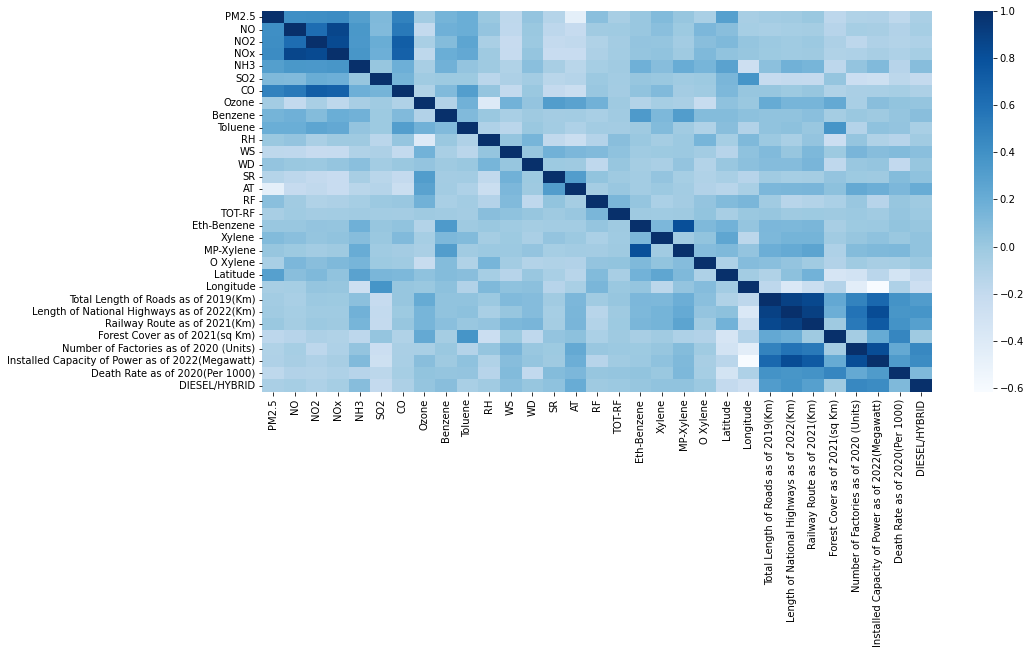

In [28]:
corr=dfv.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,cmap='Blues')

<AxesSubplot:title={'center':'Most Polluted Cities'}, xlabel='City'>

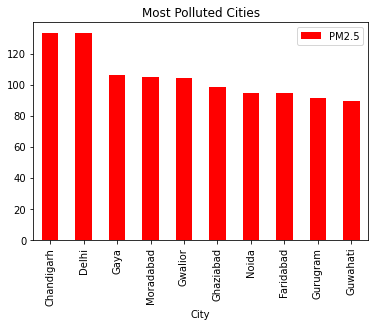

In [29]:
                                            #MOST POLLUTED CITIES
dfv[['PM2.5', 'City']].groupby(['City']).mean().sort_values('PM2.5', ascending = False).head(10).plot.bar(color='Red', title=
                                                                                                          'Most Polluted Cities')
                                                                                                   

As we can see, the most polluted cities are Delhi, Chandigarh, Gaya etc, if we consider average PM2.5 as criteria.

<AxesSubplot:title={'center':'Minimum Polluted Cities'}, ylabel='City'>

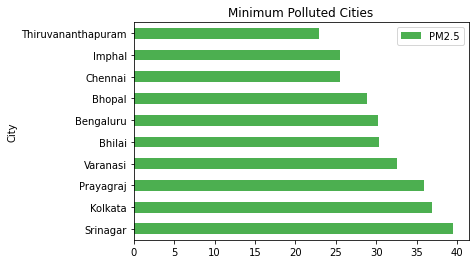

In [30]:
                                    #Least Polluted Cities
dfv[['PM2.5', 'City']].groupby(['City']).median().sort_values('PM2.5', ascending = False).tail(10).plot.barh(color= "#4CAF50",title=
                                                                                                          'Minimum Polluted Cities')

As we can see, the least polluted cities are Imphal, Thiruvananthapuram, Bhilai etc, if we consider PM2.5 as criteria.

<AxesSubplot:xlabel='City'>

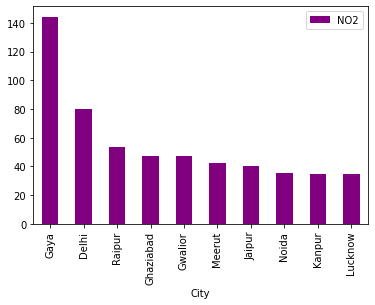

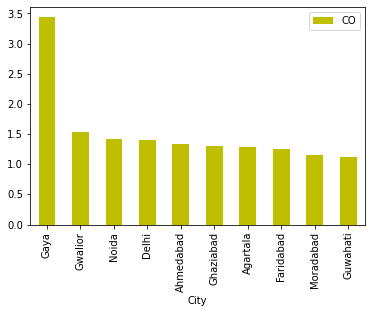

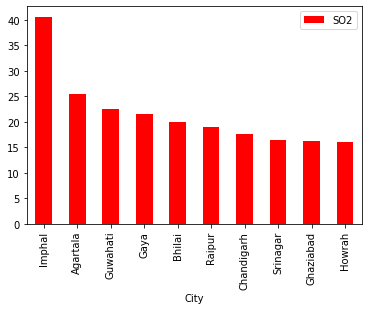

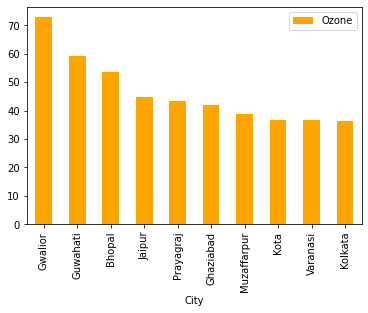

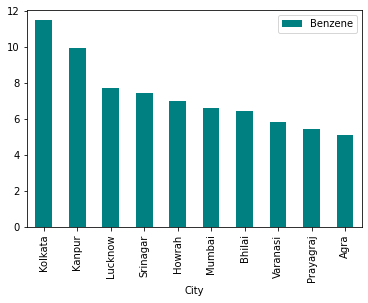

In [31]:
                                     #Pollutant Wise Polluted Cities
dfv[['NO2', 'City']].groupby(['City']).mean().sort_values("NO2", ascending = False).head(10).plot.bar(color='purple')
dfv[['CO', 'City']].groupby(['City']).mean().sort_values("CO", ascending = False).head(10).plot.bar(color='y')
dfv[['SO2', 'City']].groupby(['City']).mean().sort_values("SO2", ascending = False).head(10).plot.bar(color='r')
dfv[['Ozone', 'City']].groupby(['City']).mean().sort_values("Ozone", ascending = False).head(10).plot.bar(color='orange')
dfv[['Benzene', 'City']].groupby(['City']).mean().sort_values("Benzene", ascending = False).head(10).plot.bar(color='teal')

In case of NO2 and CO Gaya topped the list. Suprisingly, Imphal has the highest mean SO2 value throughout the years.
Kanpur being a leather hub has highest mean Benzene value.

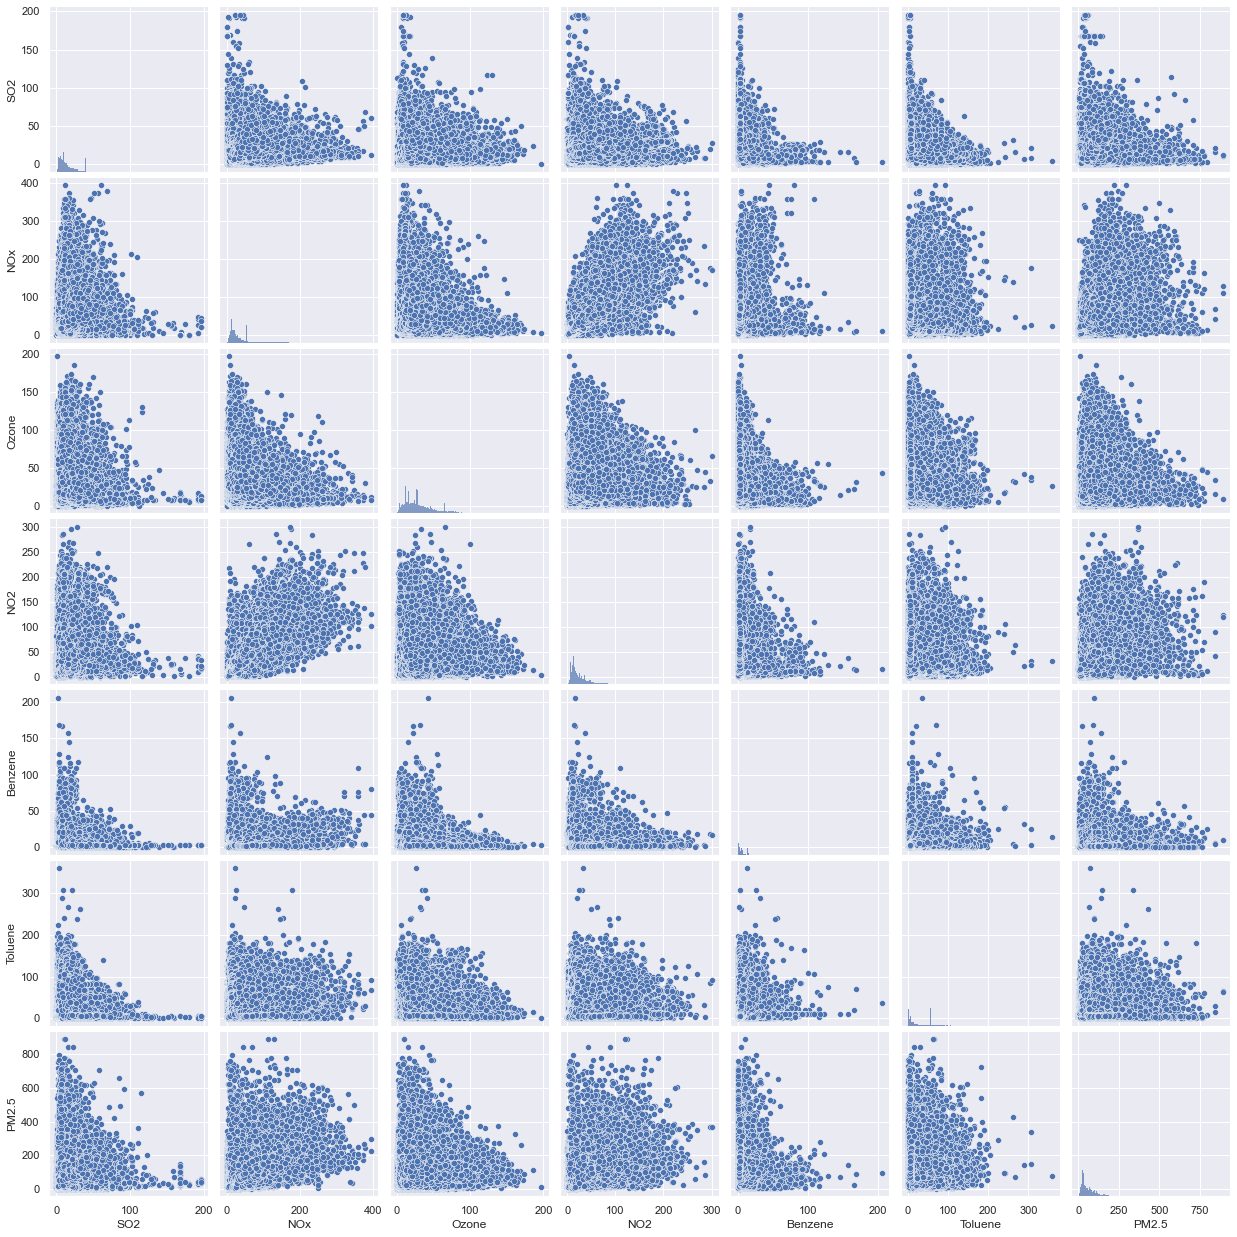

In [32]:
                                      #Plotting Pairplot to better understand the coorelation

sns.set()
cols = ['SO2', 'NOx', 'Ozone', 'NO2','Benzene','Toluene', 'PM2.5']
sns.pairplot(dfv[cols], size = 2.5)
plt.show()

<AxesSubplot:xlabel='City'>

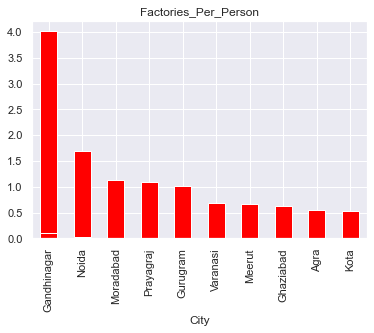

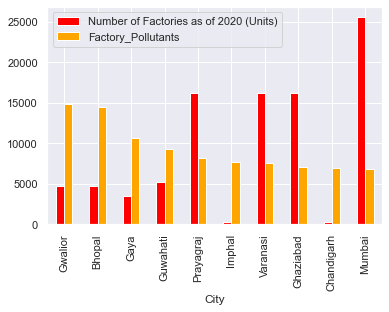

In [33]:
df_r=dfv.copy()
df_r['Pollutants']=df_r['NO']+df_r['NO2']+df_r['Ozone']+df_r['NOx']+df_r['SO2']
df_r['Factory_Pollutants']=df_r['SO2']*100+df_r['Ozone']*100+df_r['Benzene']*100+df_r['Toluene']*100
a=df_r[['Pollutants','City']].groupby(['City']).sum()
b=df_r[['Number of Factories as of 2020 (Units)','City','Factory_Pollutants']].groupby(['City']).median()
#a=df_r[['PM2.5', 'Forest Cover as of 2021(sq Km)','City']].groupby(['City']).mean()

a['Population']=[595210,2261561,8253226,12764935,1225129,2446882,1169244,11235018,31181377,1838000,268000,575652,2143000
,1140000,1135065,1409820,5400000,593524,4007505,3153425,14974073,1430870,3764619,1728435,1232190,20667655,516403,828000,2481530
,1415463,1702048,1622454,2690703,1692509]

b['Population']=[595210,2261561,8253226,12764935,1225129,2446882,1169244,11235018,31181377,1838000,268000,575652,2143000
,1140000,1135065,1409820,5400000,593524,4007505,3153425,14974073,1430870,3764619,1728435,1232190,20667655,516403,828000,2481530
,1415463,1702048,1622454,2690703,1692509]

#a['Forest_Per_Person']=a[ 'Forest Cover as of 2021(sq Km)']/a['Population']

b['Factories_Per_Person']=b['Number of Factories as of 2020 (Units)']/b['Population']

a['Pollutant_Per_Capita']=a['Pollutants']/a['Population']
#a['Pollutant_Per_Capita'].plot()
a.drop(['Agartala','Gwalior'],axis=0,inplace=True)
#a['Forest_Per_Person'].sort_values(ascending=False).head(10).plot.bar(color='Red',title='Forest_Per_Person')
a['Pollutant_Per_Capita'].sort_values(ascending=False).head(10).plot.bar(color='Red',title='Pollutant_Per_Person')

b['Factories_Per_Person'].sort_values(ascending=False).head(10).plot.bar(color='Red',title='Factories_Per_Person')

b[[ 'Number of Factories as of 2020 (Units)','Factory_Pollutants']].sort_values('Factory_Pollutants', ascending = False).head(10).plot.bar(color=['Red','Orange'])


In [34]:
b

,Number of Factories as of 2020 (Units),Factory_Pollutants,Population,Factories_Per_Person
City,,,,
Agartala,657.0,3993.473673,595210,0.001104
Agra,16184.0,3560.450964,2261561,0.007156
Ahmedabad,28479.0,6468.217243,8253226,0.003451
Bengaluru,14169.0,3693.400190,12764935,0.001110
Bhilai,3892.0,6229.572368,1225129,0.003177
Bhopal,4771.0,14467.789588,2446882,0.001950
Chandigarh,250.0,6935.018090,1169244,0.000214
Chennai,38837.0,3328.462082,11235018,0.003457
Delhi,3259.0,6368.242372,31181377,0.000105


<AxesSubplot:xlabel='City'>

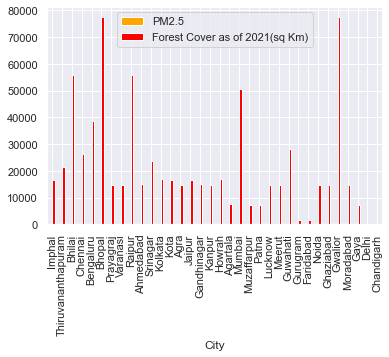

In [35]:
                                         #Forest Cover and PM2.5
dfv[['PM2.5', 'Forest Cover as of 2021(sq Km)','City']].groupby(['City']).mean().sort_values('PM2.5', ascending = True).plot.bar(color=['Orange','Red'])

As we can see there is no linear type relationship between forest cover and PM2.5 level.

<AxesSubplot:xlabel='Time Periods'>

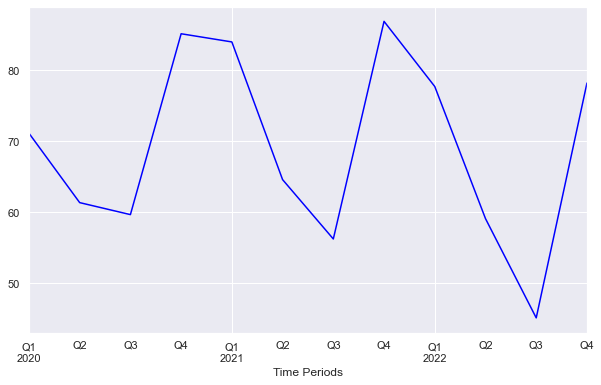

In [36]:
                         #PM2.5 level yearwise and Statewise 
df_s=dfv.copy()
df_s.set_index('Time Periods',inplace=True)
g=df_s['PM2.5'].resample('Q').mean()
plt.figure(figsize=(10,6))
g.plot(color='Blue')
#sns.lineplot(data = g , x =g.index,y=g['PM2.5'])

Most of the state have less PM2.5 level in 2020s due to lockdown and COVID-19. But as the things started to open up post COVID 
PM2.5 level peaked in 2021 and it has either stabilised or had gone some level up or down over the years. 

Now, we will create a new column 'Month' i.e. Month of the year and utilise it to analyse the PM 2.5 level monthwise

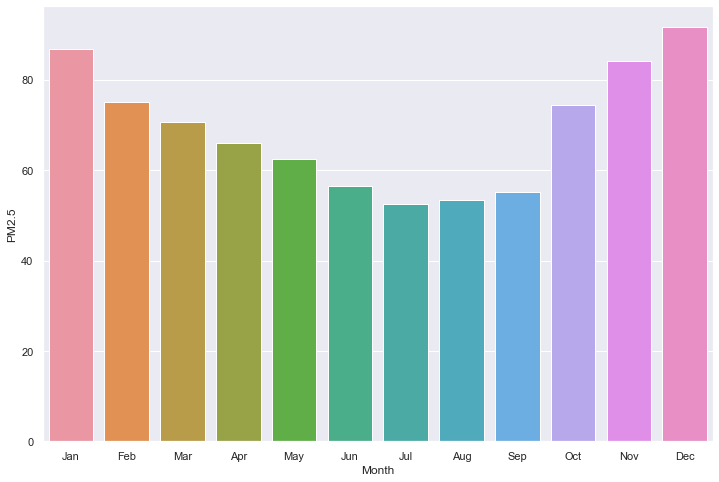

In [37]:
                                  #PM2.5 LEVEL V/S MONTH OF THE YEAR
dfv['Month']=dfv['Time Periods'].dt.month
dfv_Month_PM = dfv.loc[:,['Month','PM2.5']]
dfv_Month_PM = dfv_Month_PM.groupby('Month').mean().reset_index()
dfv_Month_PM = dfv_Month_PM.sort_values(by='Month')
plt.figure(figsize=(12,8))
g = sns.barplot(data=dfv_Month_PM, x="Month", y="PM2.5")


g.set_xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
               labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

We can see there is a rampant increase in PM2.5 level from October to January i.e. in Winter Season followed by decline in level
from February onwards.

# Preprocessing , Feature Creation and Outlier Detection

In [38]:
df_model=df1.copy()
df_model.dtypes

PM2.5                                                      float64
NO                                                         float64
NO2                                                        float64
NOx                                                        float64
NH3                                                        float64
SO2                                                        float64
CO                                                         float64
Ozone                                                      float64
Benzene                                                    float64
Toluene                                                    float64
RH                                                         float64
WS                                                         float64
WD                                                         float64
SR                                                         float64
AT                                                         flo

Now columns 'DIESEL','ELECTRIC(BOV)','PETROL','PETROL/CNG','PETROL/HYBRID' despite being numerical column have data types
as Object. So, we need to convert these columns into numeral data type for further processing. Actually, the numeral values have
commas which was analyzed in MS Excel. So, we need to remove ',' with '' to convert it into numeral data type


In [39]:
df_model=df1.copy()
cols_to_convert=['DIESEL','ELECTRIC(BOV)','PETROL','PETROL/CNG','PETROL/HYBRID']
for i in cols_to_convert:
     df_model[i]=df_model[i].str.replace(',','')
     df_model[i]=df_model[i].astype(float)
df_model.isnull().sum()

PM2.5                                               0
NO                                                  0
NO2                                                 0
NOx                                                 0
NH3                                                 0
SO2                                                 0
CO                                                  0
Ozone                                               0
Benzene                                             0
Toluene                                             0
RH                                                  0
WS                                                  0
WD                                                  0
SR                                                  0
AT                                                  0
RF                                                  0
TOT-RF                                              0
Eth-Benzene                                         0
Xylene                      

In [40]:
df_model.dtypes

PM2.5                                                      float64
NO                                                         float64
NO2                                                        float64
NOx                                                        float64
NH3                                                        float64
SO2                                                        float64
CO                                                         float64
Ozone                                                      float64
Benzene                                                    float64
Toluene                                                    float64
RH                                                         float64
WS                                                         float64
WD                                                         float64
SR                                                         float64
AT                                                         flo

Now only 'City' and 'State' are categorical columns. These can be dealt later.

In [41]:
df_f=df_model.copy()

In [42]:
df_f.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene',
       'Toluene', 'RH', 'WS', 'WD', 'SR', 'AT', 'RF', 'TOT-RF', 'Eth-Benzene',
       'Xylene', 'MP-Xylene', 'O Xylene', 'City', 'State', 'Latitude',
       'Longitude', 'Total Length of Roads as of 2019(Km)',
       'Length of National Highways as of 2022(Km)',
       'Railway Route as of 2021(Km)', 'Forest Cover as of 2021(sq Km)',
       'Number of Factories as of 2020 (Units)',
       'Installed Capacity of Power as of 2022(Megawatt)',
       'Death Rate as of 2020(Per 1000)', 'DIESEL', 'DIESEL/HYBRID',
       'ELECTRIC(BOV)', 'PETROL', 'PETROL/CNG', 'PETROL/HYBRID',
       'Time Periods'],
      dtype='object')

In [43]:
df_f.columns.nunique()

39

# OUTLIER DETECTION

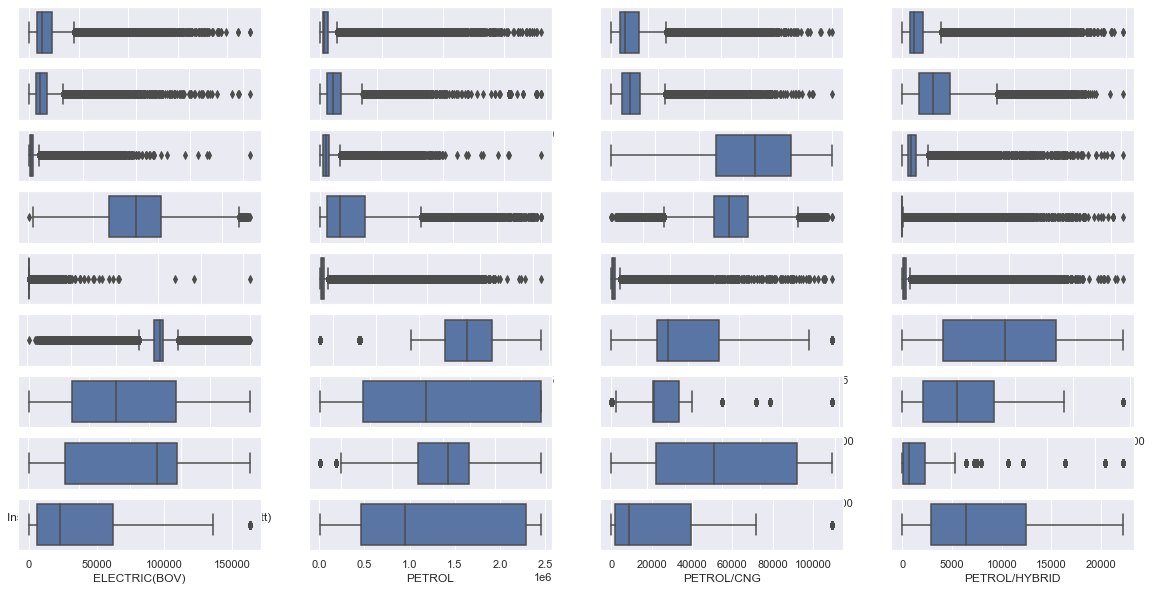

In [44]:
plt.figure(figsize=(20,10))
count=1;
for i in df_f.columns:
    if(i in ['Time Periods','City','State']):
        continue
    plt.subplot(9,4,count)
    sns.boxplot(df_f[i])
    count=count+1;

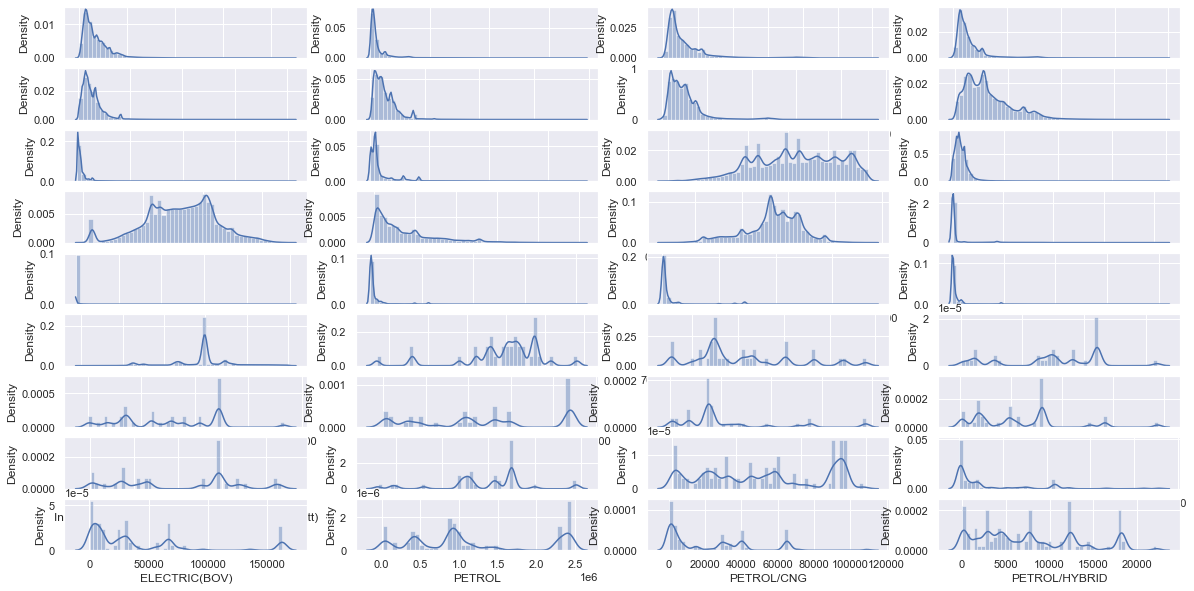

In [45]:
plt.figure(figsize=(20,10))
count=1;
for i in df_f.columns:
    if(i in ['Time Periods','City','State']):
        continue
    plt.subplot(9,4,count)
    sns.distplot(df_f[i])
    count=count+1;

It is clear that many of the columns contains outliers. Now, these outliers can be treated in accordance to our need like through box-cox transformation or by applying Standard Scaler etc. Let's see:


# OUTLIER TREATMENT

We will be applying square root transformation followed by Exponential Transformation to every column and will then plot it.

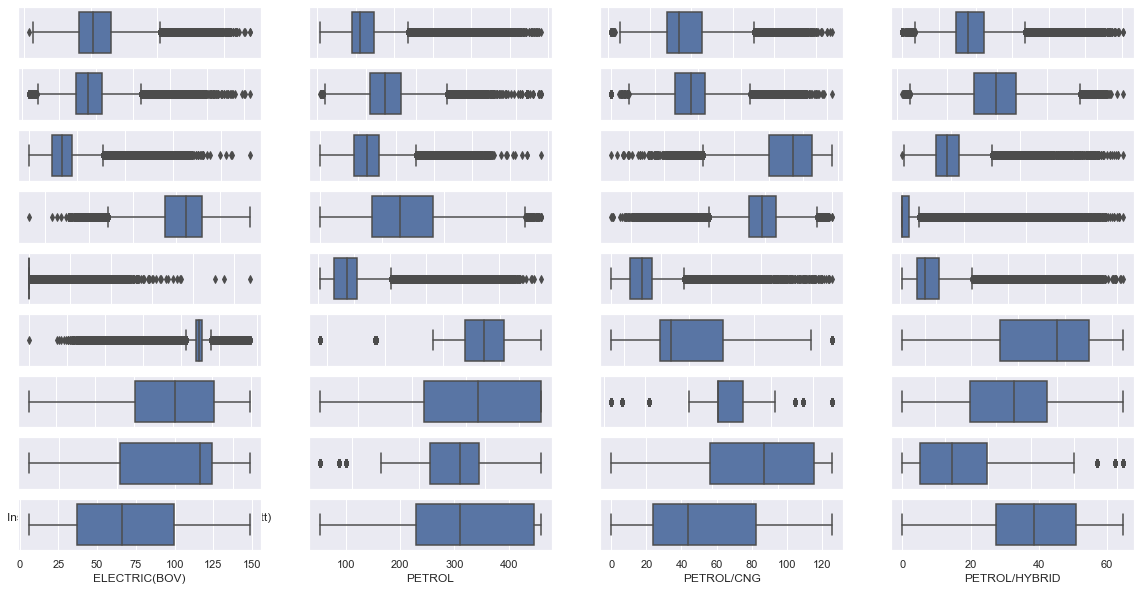

In [46]:
df_o=df_f.copy()
df_o.drop(columns=['City','State'],axis=1,inplace=True)
df_o.set_index('Time Periods')
count=1
plt.figure(figsize=(20,10))
for i in df_o.columns:
    if (i=='Time Periods'):
        continue
    df_o[i]=np.sqrt(df_o[i])
    df_o[i]=(df_o[i])**(1/1.2)
    plt.subplot(9,4,count)
    sns.boxplot(df_o[i])
    count=count+1;

# FEATURE SELECTION

In [47]:
df_k=df_f.copy()

In [48]:
X=df_f[df_f.City=='Delhi'].iloc[:,1:]
X.head()

,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,...,Number of Factories as of 2020 (Units),Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
0,181.010975,91.247522,188.364425,79.707417,10.175812,3.520142,23.411029,9.827428,8.847500,93.437813,...,3259,7617,3.6,10528.0,32,12379.0,360440.0,21424.0,5313.0,2020-01-01 00:00:00
1,194.247049,79.661701,203.481853,66.258913,11.615925,3.464807,29.331609,9.827428,8.847500,95.270911,...,3259,7617,3.6,10528.0,32,12379.0,360440.0,21424.0,5313.0,2020-01-01 04:00:00
2,112.499494,121.740909,153.914993,74.356791,10.590183,2.460498,30.172308,9.085975,8.847500,67.747391,...,3259,7617,3.6,10528.0,32,12379.0,360440.0,21424.0,5313.0,2020-01-01 08:00:00
3,56.922094,114.142207,91.504524,74.356791,12.217971,1.405930,30.493537,3.884649,104.475114,51.006233,...,3259,7617,3.6,10528.0,32,12379.0,360440.0,21424.0,5313.0,2020-01-01 12:00:00
4,77.363086,123.790340,117.065760,74.356791,13.331616,2.692100,18.045684,5.605006,96.718827,69.689844,...,3259,7617,3.6,10528.0,32,12379.0,360440.0,21424.0,5313.0,2020-01-01 16:00:00


In [49]:
y=df_f[df_f.City=='Delhi']['PM2.5']
y.head()

0    549.256878
1    435.438303
2    453.312378
3    186.603123
4    262.616309
Name: PM2.5, dtype: float64

We have choosen a particular City 'Delhi' and then had taken out the X and y dataframes. Now, these will be used to calculate
feature importance using Xgboosting.

                                     XGBOOST FOR FEATURE SELECTION

In [50]:
import xgboost as xgb
train_y = y
train_X = X.drop(['Time Periods','City','State'], axis=1)
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 20

[22:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




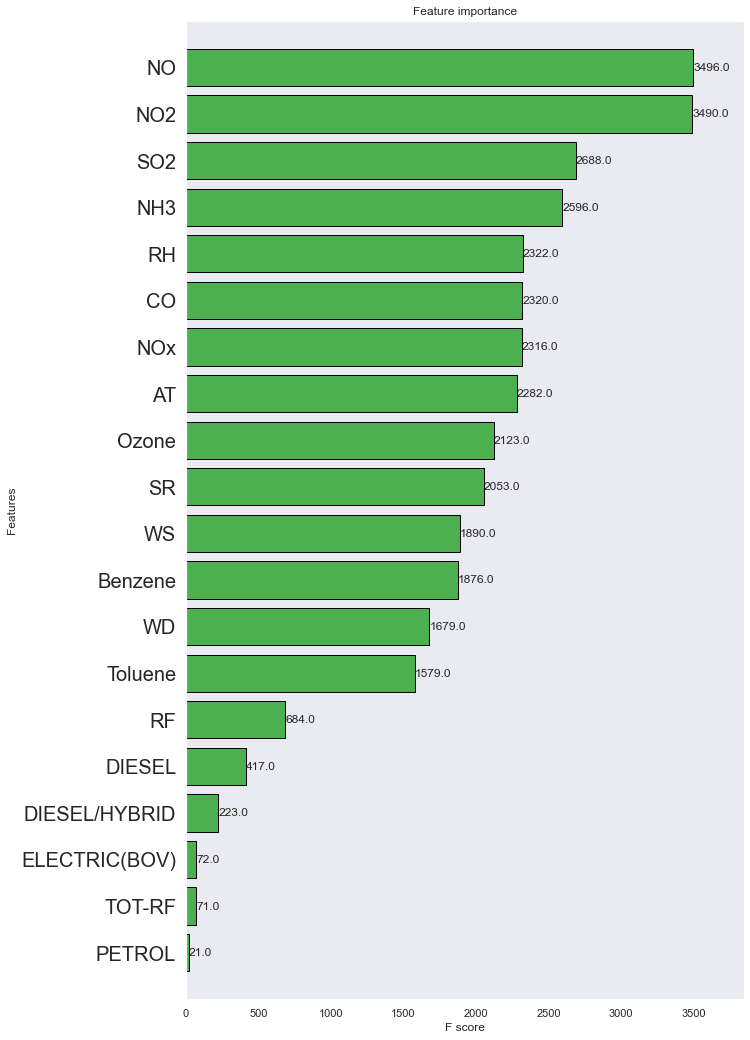

In [51]:
fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax,color="#4CAF50",edgecolor='black',grid=False)
plt.yticks(fontsize=20)
plt.show()

We can clearly see that NO,NO2,SO2,NH3,RH,CO,NOx have high influence on PM2.5 and they are important predictors

Now , we will take another city 'Chennai' and see the important features.

[22:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




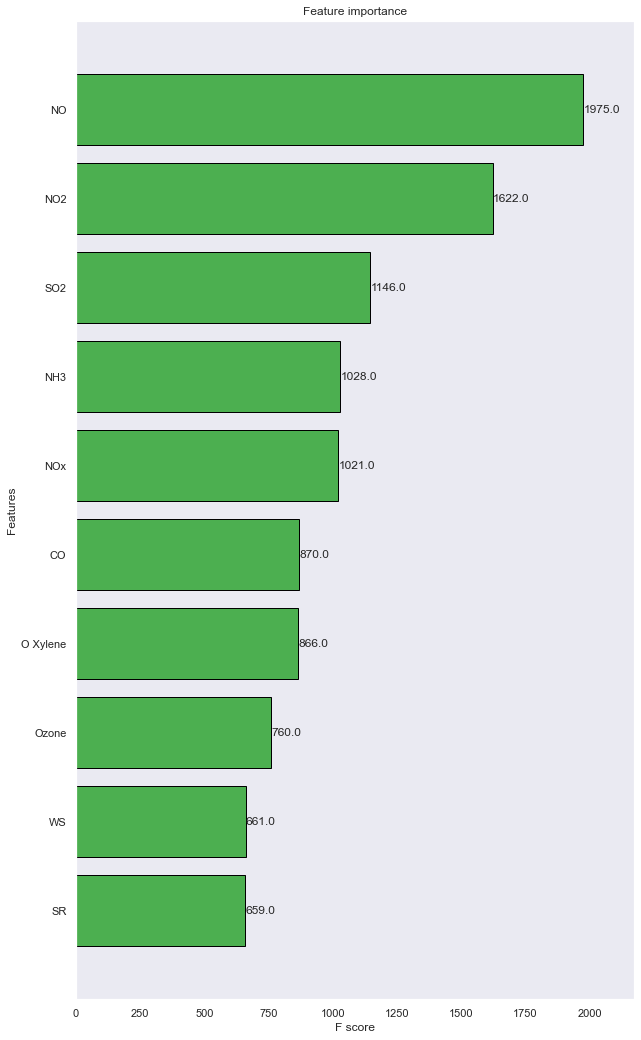

In [52]:
X=df_f[df_f.City=='Chennai'].iloc[:,1:]
y=df_f[df_f.City=='Chennai']['PM2.5']
train_y = y
train_X = X.drop(['Time Periods','City','State'], axis=1)
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 10
fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax,color="#4CAF50",edgecolor='black',grid=False)
plt.show()

We can see the most important predictors are NO,NO2,SO2,NH3,NOX,CO etc.

Now, let's use the coorelation between variables to judge important features

                                 COORELATION FOR FEATURE SELECTION

In [53]:
cor=df_f.corr()
cor_target=abs(cor['PM2.5'])
relevant_features=cor_target[cor_target>0.15]
print("Relevant feature Number",len(relevant_features))
print("The Relevant features are",relevant_features)

Relevant feature Number 13
The Relevant features are PM2.5                              1.000000
NO                                 0.409555
NO2                                0.414087
NOx                                0.431502
NH3                                0.301123
CO                                 0.490859
Benzene                            0.153715
Toluene                            0.195920
WS                                 0.170715
AT                                 0.464415
Latitude                           0.295402
Forest Cover as of 2021(sq Km)     0.164609
Death Rate as of 2020(Per 1000)    0.169662
Name: PM2.5, dtype: float64


We can see the most important features are CO,NO,AT,NOx,NH3,NO2 etc.

# Feature Engineering

We can see our treatment has reduced the outliers in some columns and in many columns it has consolidated the outliers 
towards the either side

Now, let's create some new features.
1) Petrol Vehicles: It is the sum of Petrol vehicle and petrol related vehicle columns.

2)Diesel Vehicles: It is the sum of Diesel vehicle and Diesel related vehicle columns.

3)Month: Month of the year is obtained from date using pandas datetime feature

In [54]:
df_f['Petrol_Vehicles']=df_f['PETROL']*0.0001+df_f['PETROL/CNG']*0.0001+df_f['PETROL/HYBRID']*0.0001
df_f['Diesel_Vehicles']=df_f['DIESEL']*0.0001+df_f['DIESEL/HYBRID']*0.0001
df_f['Total_Vehicles']=df_f['Petrol_Vehicles']+df_f['Diesel_Vehicles']
df_f['Month']=df_f['Time Periods'].dt.month
df_f['Vehicular_Pollution_Content']=df_f['NO']+df_f['NO2']+df_f['NOx']+df_f['NH3']+df_f['CO']
df_f['Vehicle_Pollution_Content_Per_Vehicle']=df_f['Vehicular_Pollution_Content']/df_f['Total_Vehicles']

<AxesSubplot:xlabel='City'>

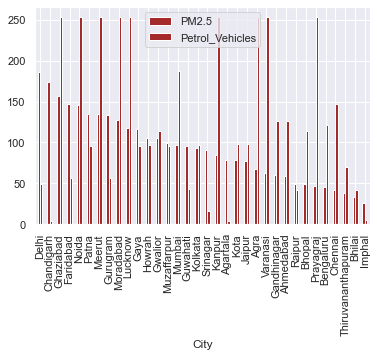

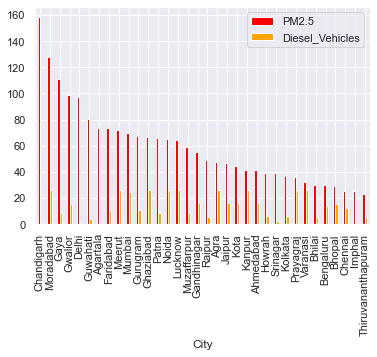

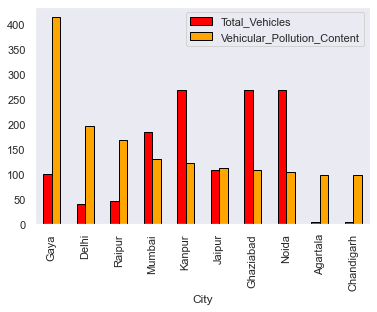

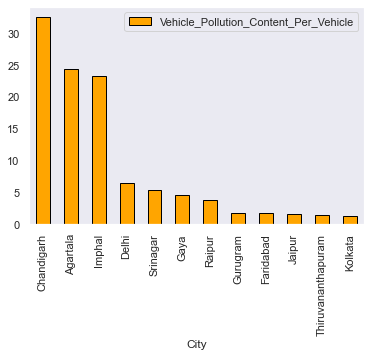

In [55]:
df_f[['PM2.5', 'Petrol_Vehicles','City']].groupby(['City']).quantile(0.8).sort_values('PM2.5', ascending = False).plot.bar(color='Brown')
df_f[['PM2.5', 'Diesel_Vehicles','City']].groupby(['City']).median().sort_values('PM2.5', ascending = False).plot.bar(color=['Red','Orange'])
df_f[[ 'Total_Vehicles','City','Vehicular_Pollution_Content']].groupby(['City']).median().sort_values('Vehicular_Pollution_Content', ascending = False).head(10).plot.bar(color=['Red','Orange'],grid=False,edgecolor='black')
df_f[['Vehicle_Pollution_Content_Per_Vehicle','City']].groupby(['City']).quantile(0.75).sort_values('Vehicle_Pollution_Content_Per_Vehicle',ascending=False).head(12).plot.bar(color='orange',grid=False,edgecolor='black')


Now, for further simplification we're dividing months into three parts Summer, Winter and Other. We are assigning a number for
each class to 'Month' column.

In [56]:
for i in df_f['Month']:
    if((i>=1) and (i<2)):
        df_f['Month']=3
    
    elif((i>=2) and (i<=4)):
        df_f['Month']=1
    
    elif((i>=5) and (i<=9)):
        df_f['Month']=2
    
    else:
        df_f['Month']=3
    

In [57]:
#Checking the dataset Now.
df_f.head()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods,Petrol_Vehicles,Diesel_Vehicles,Total_Vehicles,Month,Vehicular_Pollution_Content,Vehicle_Pollution_Content_Per_Vehicle
0,549.256878,181.010975,91.247522,188.364425,79.707417,10.175812,3.520142,23.411029,9.827428,8.847500,...,360440.0,21424.0,5313.0,2020-01-01 00:00:00,38.7177,1.056,39.7737,3,543.850482,13.673621
1,435.438303,194.247049,79.661701,203.481853,66.258913,11.615925,3.464807,29.331609,9.827428,8.847500,...,360440.0,21424.0,5313.0,2020-01-01 04:00:00,38.7177,1.056,39.7737,3,547.114323,13.755681
2,453.312378,112.499494,121.740909,153.914993,74.356791,10.590183,2.460498,30.172308,9.085975,8.847500,...,360440.0,21424.0,5313.0,2020-01-01 08:00:00,38.7177,1.056,39.7737,3,464.972686,11.690456
3,186.603123,56.922094,114.142207,91.504524,74.356791,12.217971,1.405930,30.493537,3.884649,104.475114,...,360440.0,21424.0,5313.0,2020-01-01 12:00:00,38.7177,1.056,39.7737,3,338.331546,8.506414
4,262.616309,77.363086,123.790340,117.065760,74.356791,13.331616,2.692100,18.045684,5.605006,96.718827,...,360440.0,21424.0,5313.0,2020-01-01 16:00:00,38.7177,1.056,39.7737,3,395.268076,9.937926


In [58]:
df_f.tail()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods,Petrol_Vehicles,Diesel_Vehicles,Total_Vehicles,Month,Vehicular_Pollution_Content,Vehicle_Pollution_Content_Per_Vehicle
223579,196.989121,60.688939,88.463906,104.906711,109.511292,53.108086,2.336561,55.699203,3.684526,7.927572,...,1741675.0,109369.0,22206.0,2022-12-31 04:00:00,187.325,29.6489,216.9739,3,365.907409,1.686412
223580,187.428487,56.707438,93.311216,103.099160,106.682026,55.535340,2.235001,73.030945,3.388236,6.980251,...,1741675.0,109369.0,22206.0,2022-12-31 08:00:00,187.325,29.6489,216.9739,3,362.034841,1.668564
223581,176.635690,28.382382,87.318776,80.058537,110.258415,53.701056,1.754315,93.830288,3.328736,6.993954,...,1741675.0,109369.0,22206.0,2022-12-31 12:00:00,187.325,29.6489,216.9739,3,307.772425,1.418477
223582,189.740021,12.664340,54.773063,51.766913,67.224030,40.155829,1.361177,73.099207,2.423073,4.875033,...,1741675.0,109369.0,22206.0,2022-12-31 16:00:00,187.325,29.6489,216.9739,3,187.789523,0.865494
223583,164.385975,24.014566,66.402465,70.142974,94.957895,33.771574,1.770766,45.108456,2.719856,6.109795,...,1741675.0,109369.0,22206.0,2022-12-31 20:00:00,187.325,29.6489,216.9739,3,257.288667,1.185805


In [59]:
df_f.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene',
       'Toluene', 'RH', 'WS', 'WD', 'SR', 'AT', 'RF', 'TOT-RF', 'Eth-Benzene',
       'Xylene', 'MP-Xylene', 'O Xylene', 'City', 'State', 'Latitude',
       'Longitude', 'Total Length of Roads as of 2019(Km)',
       'Length of National Highways as of 2022(Km)',
       'Railway Route as of 2021(Km)', 'Forest Cover as of 2021(sq Km)',
       'Number of Factories as of 2020 (Units)',
       'Installed Capacity of Power as of 2022(Megawatt)',
       'Death Rate as of 2020(Per 1000)', 'DIESEL', 'DIESEL/HYBRID',
       'ELECTRIC(BOV)', 'PETROL', 'PETROL/CNG', 'PETROL/HYBRID',
       'Time Periods', 'Petrol_Vehicles', 'Diesel_Vehicles', 'Total_Vehicles',
       'Month', 'Vehicular_Pollution_Content',
       'Vehicle_Pollution_Content_Per_Vehicle'],
      dtype='object')

Now, some of the following columns had to be removed like those from whom new features are made and those who doesn't contribute
much like Latitude and Longitude. State Column is also removed as we want the result Citywise and State is also categorical in
nature.

In [60]:
df_f.drop(['DIESEL','DIESEL/HYBRID','PETROL','PETROL/CNG','PETROL/HYBRID','Latitude','Longitude',
           'Death Rate as of 2020(Per 1000)','State'],axis=1,inplace=True)
df_f.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene',
       'Toluene', 'RH', 'WS', 'WD', 'SR', 'AT', 'RF', 'TOT-RF', 'Eth-Benzene',
       'Xylene', 'MP-Xylene', 'O Xylene', 'City',
       'Total Length of Roads as of 2019(Km)',
       'Length of National Highways as of 2022(Km)',
       'Railway Route as of 2021(Km)', 'Forest Cover as of 2021(sq Km)',
       'Number of Factories as of 2020 (Units)',
       'Installed Capacity of Power as of 2022(Megawatt)', 'ELECTRIC(BOV)',
       'Time Periods', 'Petrol_Vehicles', 'Diesel_Vehicles', 'Total_Vehicles',
       'Month', 'Vehicular_Pollution_Content',
       'Vehicle_Pollution_Content_Per_Vehicle'],
      dtype='object')

# MODEL BUILDING: FACEBOOK PROPHET 

THE FOLLOWING MODEL IS BUILD IN GOOGLE COLAB AS IT WAS BEING DIFFICULT FOR US TO DOWNLOAD FBPROPHET IN JUPYTER NOTEBOOK AND IT WAS QUITE SIMPLE ON GOOGLE COLAB. THE FINAL SUBMISSION OF OUR TEAM ARE THE RESULTS WHICH WERE OBTAINED AFTER APPLYING FACEBOOK
PROPHET.

In [61]:
#installing the prophet library in Google Colab
!pip install prophet

import prophet

     ---------------------------------------- 12.9/12.9 MB 2.5 MB/s eta 0:00:00
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
     -------------------------------------- 754.3/754.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 2.4 MB/s eta 0:00:00
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)


In [62]:
#importing the prophet for model building
from prophet import Prophet


# MODEL TESTING AND VALIDATION

RMSE Score is obtained citywise and then mean RMSE Score is obtained. Hyperparameter tuning is performed to obtain the minimum 
RMSE score.

In [52]:
from statsmodels.tools.eval_measures import rmse
ans=[]
city=df_f.City.unique().tolist()
for i in city:
  df_c=df_f.copy() # A copy is created
  model_f=Prophet(changepoint_range=0.95,changepoint_prior_scale=0.037) #Model initiation
  df_c=df_c[df_c.City==i] # A particular city data
  df_c=df_c.rename(columns={'PM2.5':'y','Time Periods':'ds'})
  train=df_c.iloc[:6000,:]
  test=df_c.iloc[6000:,:]
  model_f.fit(train)
  future_dates=model_f.make_future_dataframe(periods=576,freq='4H') 
  forecast=model_f.predict(future_dates)
  predictions = forecast.iloc[-len(test):]['yhat']
  actuals = test['y']
  ans.append(round(rmse(predictions, actuals)))
ans

DEBUG:cmdstanpy:input tempfile: /tmp/tmpuam5pvyu/x5w_ge80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuam5pvyu/ze3m20na.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34628', 'data', 'file=/tmp/tmpuam5pvyu/x5w_ge80.json', 'init=/tmp/tmpuam5pvyu/ze3m20na.json', 'output', 'file=/tmp/tmpuam5pvyu/prophet_modelp0l82ltd/prophet_model-20230520210438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:04:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:04:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuam5pvyu/totxqhya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuam5pvyu/t_drlnmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

[144,
 40,
 19,
 68,
 37,
 79,
 50,
 106,
 47,
 97,
 67,
 47,
 31,
 99,
 105,
 47,
 44,
 50,
 36,
 53,
 98,
 107,
 90,
 43,
 68,
 55,
 77,
 64,
 35,
 4,
 20,
 66,
 34,
 65]

In [53]:
sum=0
for i in range(len(ans)):
  sum=sum+ans[i]
print("Mean RMSE is",sum/len(ans))

Mean RMSE is 61.529411764705884


MEAN RMSE SCORE IS 61.529

# Final Model Building

   Now, we know that we had to forecast CityWise. So, we cannot take the whole dataset and predict atonce. We have to go city by city. Now, using for loop we will loop over each city and using facebook prophet we will forecast the PM2.5 value. Prophet will
   initially be trained and then it will be used for forecasting in accordance to submission template.
   The forecasted values city wise will be saved in the device and from there it will be transferred to Submission Template.

In [ ]:
for i in c:
  df_c=df_f.copy() # A copy is created
  model_f=Prophet(changepoint_range=0.95,changepoint_prior_scale=0.037) #Model initiation
  df_c=df_c[df_c.City==i] # A particular city data
  df_c=df_c.rename(columns={'PM2.5':'y','Time Periods':'ds'}) # Renaming for prediction purpose in prophet
  model_f.fit(df_c) #fitting the model
  future_dates=model_f.make_future_dataframe(periods=18,freq='4H') #making future dataframes for forecasting
  forecast=model_f.predict(future_dates) #predicting
  f=forecast.tail(18)[['ds','yhat']]    #taking out forecasted value which is in accordance to submission template
  df=pd.DataFrame(f)   #creating a dataframe
  filename=i+'.'+'csv'  #creating a filename with city name attached to it so it is easy to track
  df.to_csv(filename)  #saving forecasted dataframe of a particular city
  files.download(filename) #downloading forecasted dataframe of a particular city


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/deoalma7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/6wrwyeid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54312', 'data', 'file=/tmp/tmp1e8_70wx/deoalma7.json', 'init=/tmp/tmp1e8_70wx/6wrwyeid.json', 'output', 'file=/tmp/tmp1e8_70wx/prophet_modelx7z9b7em/prophet_model-20230511161126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/3s5i7e_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/gjlp9jog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79345', 'data', 'file=/tmp/tmp1e8_70wx/3s5i7e_w.json', 'init=/tmp/tmp1e8_70wx/gjlp9jog.json', 'output', 'file=/tmp/tmp1e8_70wx/prophet_model3ubhgevd/prophet_model-20230511161130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/heq8xvt2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/g_vucjat.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44600', 'data', 'file=/tmp/tmp1e8_70wx/heq8xvt2.json', 'init=/tmp/tmp1e8_70wx/g_vucjat.json', 'output', 'file=/tmp/tmp1e8_70wx/prophet_modelmkzt2vnh/prophet_model-20230511161136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/0bjoih8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/5t4bdlab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4170', 'data', 'file=/tmp/tmp1e8_70wx/0bjoih8q.json', 'init=/tmp/tmp1e8_70wx/5t4bdlab.json', 'output', 'file=/tmp/tmp1e8_70wx/prophet_modeldlgcyt6t/prophet_model-20230511161140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/73skeuub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/97cezs_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27069', 'data', 'file=/tmp/tmp1e8_70wx/73skeuub.json', 'init=/tmp/tmp1e8_70wx/97cezs_8.json', 'output', 'file=/tmp/tmp1e8_70wx/prophet_modeld6i9nr3n/prophet_model-20230511161144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Forecasted Values are saved from Google Colab to device and final submission template is prepared.

Below are some hit and trial which were performed before the final model was build.

In [ ]:
 
#model=Prophet(changepoint_range=0.95,changepoint_prior_scale=0.03)


In [ ]:
#df_m=df_f.copy()

In [ ]:
#df_m=df_m[df_m.City=='Gandhinagar']

In [ ]:
#df_m.drop('City',axis=1,inplace=True)

In [ ]:
#df_m=df_m.rename(columns={'PM2.5':'y','Time Periods':'ds'})

In [ ]:
#model.fit(df_m)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/0g8iyuwu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1e8_70wx/77vs8ngp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38410', 'data', 'file=/tmp/tmp1e8_70wx/0g8iyuwu.json', 'init=/tmp/tmp1e8_70wx/77vs8ngp.json', 'output', 'file=/tmp/tmp1e8_70wx/prophet_modelkvgr_k1l/prophet_model-20230511152143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#future_dates=model.make_future_dataframe(periods=18,freq='4H')
#forecast=model.predict(future_dates)

In [ ]:
#f=forecast.tail(18)[['ds','yhat']]

#df=pd.DataFrame(f)
#df


,ds,yhat
6576,2023-01-01 00:00:00,63.175235
6577,2023-01-01 04:00:00,60.861872
6578,2023-01-01 08:00:00,61.822851
6579,2023-01-01 12:00:00,57.914010
6580,2023-01-01 16:00:00,58.080425
6581,2023-01-01 20:00:00,62.172267
6582,2023-01-02 00:00:00,63.486170
6583,2023-01-02 04:00:00,60.998004
6584,2023-01-02 08:00:00,61.668146
6585,2023-01-02 12:00:00,57.384898


In [ ]:
#df.to_csv('G.csv') 
#files.download('G.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

OTHER MODELS (LIKE LSTM etc,) WERE EXPLORED IN OTHER NOTEBOOKS. FACEBOOK PROPHET MODEL WAS USED FOR THE FINAL PREDICTIONS.


# THANK YOU